In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement:

\begin{equation} H_{0} : p_{gate30} - p_{gate40} >= 0 \end{equation}

\begin{equation} H_{1} : p_{gate30} - p_{gate40} < 0 \end{equation}

## Read & Understand the data

In [13]:
### Your Code Here ###
df = pd.read_csv("cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### How many player in each group?

##### Hint: Use groupby with count

In [14]:
### Your Code Here ###
df.version.value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

### What is the percentage of users that came back the day after they installed?

In [15]:
### Your Code Here ###
df.retention_1.value_counts(normalize=True)

False    0.55479
True     0.44521
Name: retention_1, dtype: float64

### What is the percentage of users of each group [gate_30, gate_40] that came back the day after they installed?


In [16]:
### Your Code Here ###
df.groupby("version")["retention_1"].value_counts(normalize=True)

version  retention_1
gate_30  False          0.551812
         True           0.448188
gate_40  False          0.557717
         True           0.442283
Name: retention_1, dtype: float64

In [21]:
df.query("version == 'gate_30'")["retention_1"].mean()

0.4481879194630872

In [23]:
obs_mean = (df.query("version == 'gate_30'")["retention_1"].mean()) - (df.query("version == 'gate_40'")["retention_1"].mean())
obs_mean

0.005905169787341458

### Bootstrap the data by resampling the dataset with replacement for retention_1

##### Hint:  use .sample method with frac = 1 and replace = True
##### Hint:  groupby the result of sampling by version column then select retention_1 column and apply mean as an agg function
##### Hint: take difference in mean between the 2 groups in each iteration and append it to a list

In [17]:
### Your Code Here ###
diff = []
for i in range (1000):
    boot_sample = df.sample(frac=1, replace=True)
    gate_30 = boot_sample.query("version == 'gate_30'")
    gate_40 = boot_sample.query("version == 'gate_40'")
    gate_30_mean = gate_30.retention_1.mean()
    gate_40_mean = gate_40.retention_1.mean()
    diff.append(gate_30_mean - gate_40_mean)

In [18]:
diff = np.array(diff)

### Plot the difference distribution 

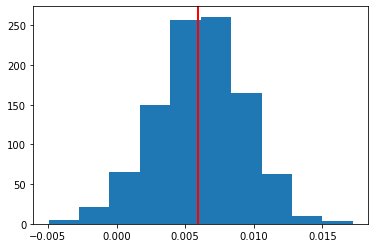

In [27]:
### Your Code Here ###

plt.hist(diff);
plt.axvline(obs_mean, lw=2, color = "r");

### At alpha level 0.05, should we reject the null ?
##### Hint: Calculate the STDerr, Simulate under the null, Calculate the p-value

In [28]:
### Your Code Here ###
(diff<obs_mean).mean()

0.464

In [29]:
### Your Code Here ###
diff2 = []
for i in range (1000):
    boot_sample = df.sample(frac=1, replace=True)
    gate_30 = boot_sample.query("version == 'gate_30'")
    gate_40 = boot_sample.query("version == 'gate_40'")
    gate_30_mean = gate_30.retention_7.mean()
    gate_40_mean = gate_40.retention_7.mean()
    diff2.append(gate_30_mean - gate_40_mean)

In [30]:
obs_mean_2 = (df.query("version == 'gate_30'")["retention_7"].mean()) - (df.query("version == 'gate_40'")["retention_7"].mean())
obs_mean_2

0.008201298315205913

In [31]:
diff2 = np.array(diff2)

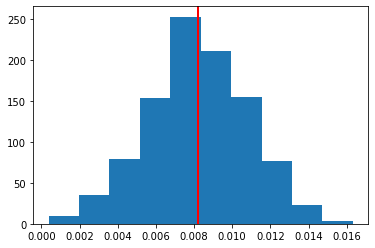

In [32]:
plt.hist(diff2);
plt.axvline(obs_mean_2, lw=2, color = "r");

In [34]:
(diff2<obs_mean_2).mean()

0.504

**From this information we fail to reject the null hypoyhesis so we should keep using the current version**